# Import Packages

In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle

# Load datset

In [2]:
train = pd.read_csv('train.csv')
with open('cleaned_df.pkl', 'rb') as f:
    df = pickle.load(f)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,2,2008,WD,Normal
1,20,RL,80.0,9600,0,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,5,2007,WD,Normal
2,60,RL,68.0,11250,0,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,9,2008,WD,Normal
3,70,RL,60.0,9550,0,NoAlley,IR1,Lvl,AllPub,Corner,...,0,0,NoPool,NoFen,NoMF,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,0,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,NoPool,NoFen,NoMF,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,MnPrv,NoMF,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,0,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,NoPool,NoFen,NoMF,0,4,2010,WD,Normal


In [3]:
#create x and y
X = df
y = train.SalePrice

#identify continuous and categorical X variables
# no'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold', or'YrSold',  
#identify all continuous X variables
continuous_X = X[['LotFrontage','LotArea', 'MasVnrArea', 'BsmtFinSF1',
                 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', 
                  '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 
                  'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
                  'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                  'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                  '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal']]

#identify all categorical X variables
all_categorical_X = []
for variable in X.columns:
    if variable not in continuous_X:
        all_categorical_X.append(variable)
    else:
        continue
categorical_X = X[all_categorical_X]

#binary categorical variables are 'Street','CentralAir'

# Dummify Non-binary categorical variables

In [4]:
categorical_X.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [20]:
df_w_dummies = df.copy()


for column in categorical_X.columns:
    if column == 'Street' or column == 'CentralAir':
        continue
    else:
        new_columns = pd.get_dummies(df[column], prefix=column, prefix_sep='__')
        df_w_dummies = pd.concat([df_w_dummies.drop(column, axis=1), new_columns], axis=1)
        

In [6]:
pd.DataFrame(df_w_dummies.columns, columns=['Column_Name'])

,Column_Name
0,LotFrontage
1,LotArea
2,Street
3,MasVnrArea
4,BsmtFinSF1
...,...
608,SaleCondition__AdjLand
609,SaleCondition__Alloca
610,SaleCondition__Family
611,SaleCondition__Normal


In [7]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_w_dummies, y, test_size=0.2, random_state=42)



In [19]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.959483
--------------------------------------------------
R^2 for test  set: 0.612123


In [21]:
ols.coef_, ols.intercept_

(array([ 1.69227028e+01,  6.82420496e-01, -1.93595840e+04,  1.49832007e+01,
         1.75925974e+01,  5.72004712e+00,  1.37348778e+00,  2.46918836e+01,
         8.27739794e+03,  1.78908112e+00,  2.06855261e+01,  1.05888297e+01,
         3.30386672e+01,  3.97949624e+03, -1.49319400e+03,  1.66089952e+03,
         2.73946717e+03, -9.21739250e+02,  2.86860628e+03,  7.30328594e+02,
         5.35052040e+03,  2.74257341e+03,  2.17238755e+01,  1.61427406e+01,
         1.76083330e+00,  1.13045759e+01,  4.45403985e+01,  4.00393762e+01,
         4.70141978e+03, -3.32057772e+00,  1.89279659e+03, -2.60120179e+03,
        -1.42327878e+03, -2.23077922e+04,  1.24734052e+04,  5.07496816e+03,
         8.76078078e+03,  7.81625196e+03,  1.26758488e+03, -8.20697903e+03,
        -5.06063667e+03, -2.51743253e+03, -3.17735843e+03,  1.99320396e+03,
         6.01568786e+03, -1.28587968e+04,  1.71089130e+04, -3.66516838e+03,
         3.54027711e+03, -4.12522486e+03,  1.58203048e+03, -3.53668212e+02,
        -1.2

In [22]:
ols1 = LinearRegression()
ols2 = LinearRegression()
ols1.fit(X_train, y_train)
ols2.fit(X_test, y_test)

ols1.coef_

ols2.coef_

array([-8.73890528e+01,  8.88576963e-01,  8.23695648e+03,  9.31624905e-01,
       -6.35037416e+00,  2.60216894e+01, -8.68568036e-02,  1.95844890e+01,
        1.08425514e+04,  3.10816834e+01,  5.82031284e+01, -7.62890674e+01,
        1.29957191e+01,  1.36649199e+04,  1.53246446e+04,  3.98966600e+04,
        2.40936324e+04,  3.97359788e+03, -1.03917264e+04, -4.34805543e+03,
        5.99666388e+03,  1.46840446e+04,  1.37412265e+01, -2.12381686e+01,
        1.29481895e+02,  1.32387958e+01,  2.00033089e+02,  6.27426806e+01,
        1.55388687e+02,  1.04760592e+01,  1.10479158e+04, -1.07032009e+04,
       -8.54047046e+02,  1.13239934e+04, -9.60993036e+03,  1.33296276e+04,
       -1.04320360e+04, -1.18513668e+04,  7.29390366e+03,  2.57961644e+04,
       -3.17450248e+02,  2.74628968e+03, -1.45920569e+04, -1.93423524e+04,
        6.16454617e+03,  5.53443408e+03,  6.77826836e+03, -7.33025701e+03,
       -8.30107166e+02, -4.15233826e+03,  1.59933140e+04, -1.05041241e+04,
       -5.48918988e+03,  

In [24]:
continuous_features = continuous_X.columns
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = df_w_dummies.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   

Text(0.5, 1.0, '$R^2$ of a continuous feature against the other features')

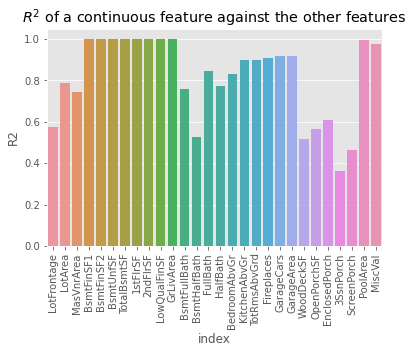

In [28]:
import seaborn as sns
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.xticks(rotation = 'vertical')
plt.title('$R^2$ of a continuous feature against the other features')


In [23]:
colnames = df_w_dummies.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
LotFrontage,1.692270e+01
LotArea,6.824205e-01
Street,-1.935958e+04
MasVnrArea,1.498320e+01
BsmtFinSF1,1.759260e+01
...,...
SaleCondition__Alloca,1.034233e+04
SaleCondition__Family,-9.859431e+03
SaleCondition__Normal,-4.252204e+02
SaleCondition__Partial,-1.093897e+04


In [29]:
slopes = result.loc[continuous_X.columns]
slopes.columns = ['slope']
slopes

,slope
LotFrontage,16.922703
LotArea,0.682420
MasVnrArea,14.983201
BsmtFinSF1,17.592597
BsmtFinSF2,5.720047
BsmtUnfSF,1.373488
TotalBsmtSF,24.691884
1stFlrSF,1.789081
2ndFlrSF,20.685526
LowQualFinSF,10.588830
